In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Analyses
from src.analyses.schedule_jobs_dataframe import jobs_metrics_from_operations_df, mean_start_deviation_per_shift_df

# Plots
from src.analyses.fig_experiment import make_combined_figure_startdeviation_tardiness_earliness

In [4]:
df_experiments = pd.read_csv("output/experiments_v01.csv")
df_experiments

,Experiment_ID,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Sim Sigma,Shift Length,w_t,w_e,w_dev,Experiment_Type,max_utilization
0,B-1,0.25,1.00,0.75,0.1,1440,1,0,3,CP,0.75
1,B-2,0.25,0.75,0.75,0.1,1440,3,1,12,CP,0.75
2,B-3,0.25,0.50,0.75,0.1,1440,1,1,6,CP,0.75
3,B-4,0.25,0.25,0.75,0.1,1440,1,3,12,CP,0.75
4,B-5,0.25,0.00,0.75,0.1,1440,0,1,3,CP,0.75
...,...,...,...,...,...,...,...,...,...,...,...
175,R-125,1.00,1.00,0.95,0.3,1440,1,0,0,CP,0.95
176,R-126,1.00,0.75,0.95,0.3,1440,3,1,0,CP,0.95
177,R-127,1.00,0.50,0.95,0.3,1440,1,1,0,CP,0.95
178,R-128,1.00,0.25,0.95,0.3,1440,1,3,0,CP,0.95


In [5]:
df_schedules = pd.read_csv("output/schedules_v01.csv")
df_schedules

,Job,Routing_ID,Experiment_ID,Arrival,Ready Time,Due Date,Shift,Operation,Machine,Original Duration,Start,End,max_utilization
0,01-07500-0000,01-07,B-1,0,1440,3405,1,0,M02,31,2130,2161,0.75
1,01-07500-0000,01-07,B-2,0,1440,3405,1,0,M02,31,2133,2164,0.75
2,01-07500-0000,01-07,B-3,0,1440,3405,1,0,M02,31,1762,1793,0.75
3,01-07500-0000,01-07,B-4,0,1440,3405,1,0,M02,31,2150,2181,0.75
4,01-07500-0000,01-07,B-5,0,1440,3405,1,0,M02,31,1810,1841,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014397,01-09500-0460,01-03,R-125,31544,31680,34164,22,9,M05,43,33513,33556,0.95
1014398,01-09500-0460,01-03,R-126,31544,31680,34164,22,9,M05,43,34121,34164,0.95
1014399,01-09500-0460,01-03,R-127,31544,31680,34164,22,9,M05,43,34121,34164,0.95
1014400,01-09500-0460,01-03,R-128,31544,31680,34164,22,9,M05,43,34121,34164,0.95


### Tardiness/Earliness (Metrics)

In [6]:
df_metrics = jobs_metrics_from_operations_df(df_schedules)
df_metrics

,Job,Routing_ID,Experiment_ID,Shift,Arrival,Due Date,Completion,Tardiness,Earliness,Lateness
0,01-07500-0000,01-07,B-1,1,0,3405,3068,0,337,-337
1,01-07500-0001,01-06,B-1,1,60,2433,2374,0,59,-59
2,01-07500-0002,01-01,B-1,1,142,2766,2427,0,339,-339
3,01-07500-0003,01-05,B-1,1,197,2640,2262,0,378,-378
4,01-07500-0004,01-04,B-1,1,249,3581,3078,0,503,-503
...,...,...,...,...,...,...,...,...,...,...
74455,01-08500-0409,01-07,R-99,22,31539,33765,33942,177,0,177
74456,01-08500-0410,01-09,R-99,22,31589,33041,33622,581,0,581
74457,01-08500-0411,01-03,R-99,22,31599,33608,33608,0,0,0
74458,01-08500-0412,01-06,R-99,22,31620,33025,33712,687,0,687


### Start Deviation

In [7]:
df_dev = mean_start_deviation_per_shift_df(df_schedules)
df_dev.head(12)

,Experiment_ID,Shift,Deviation,Pairs
0,B-1,2,55.400000,20
1,B-1,3,85.100000,20
2,B-1,4,86.272727,55
3,B-1,5,33.097561,82
4,B-1,6,17.619048,21
5,B-1,7,0.000000,9
6,B-1,8,9.764706,34
7,B-1,9,41.112676,71
8,B-1,10,1.260870,23
9,B-1,11,28.333333,18


In [8]:
df_dev.to_csv("output/experiment_shift_dev_v01.csv", index=False)

### Vergleiche

In [9]:
def get_experiment_string(df, experiment_id):
    row = df[df["Experiment_ID"] == experiment_id].iloc[0]
    return (
        f"Experiment {experiment_id}\n"
        f"lateness/deviation = {row['Abs Lateness Ratio']:.2f}, "
        f"tardiness/earliness = {row['Inner Tardiness Ratio']:.2f}, "
        f"bottleneck utilization = {row['Max Bottleneck Utilization']:.2f} "
        f"(sigma = {row['Sim Sigma']:.2f})"
    )

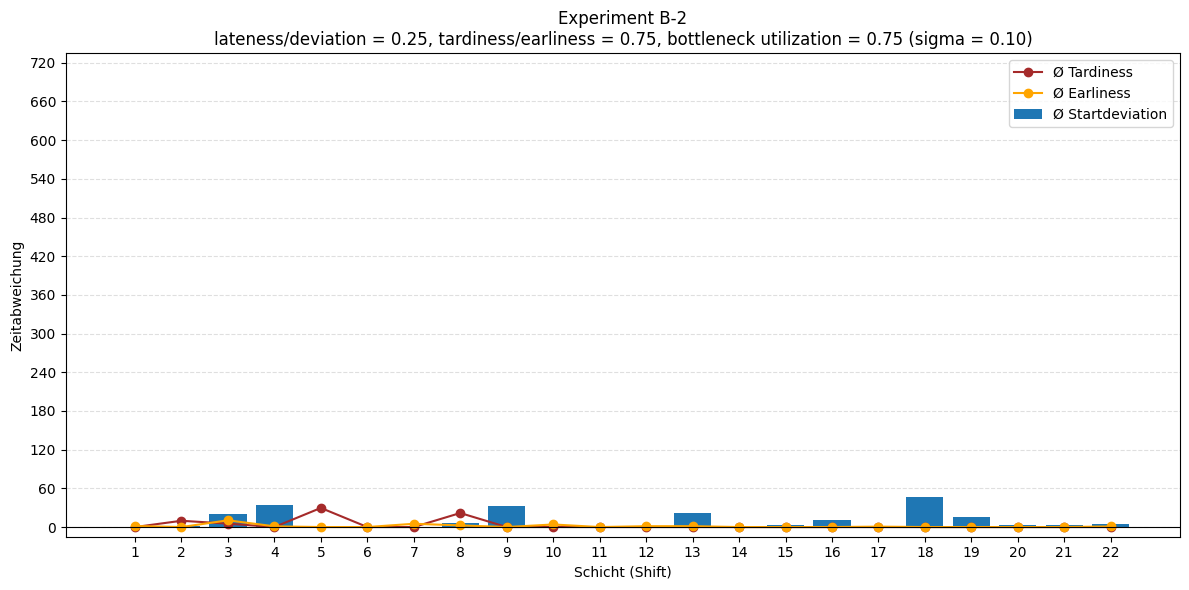

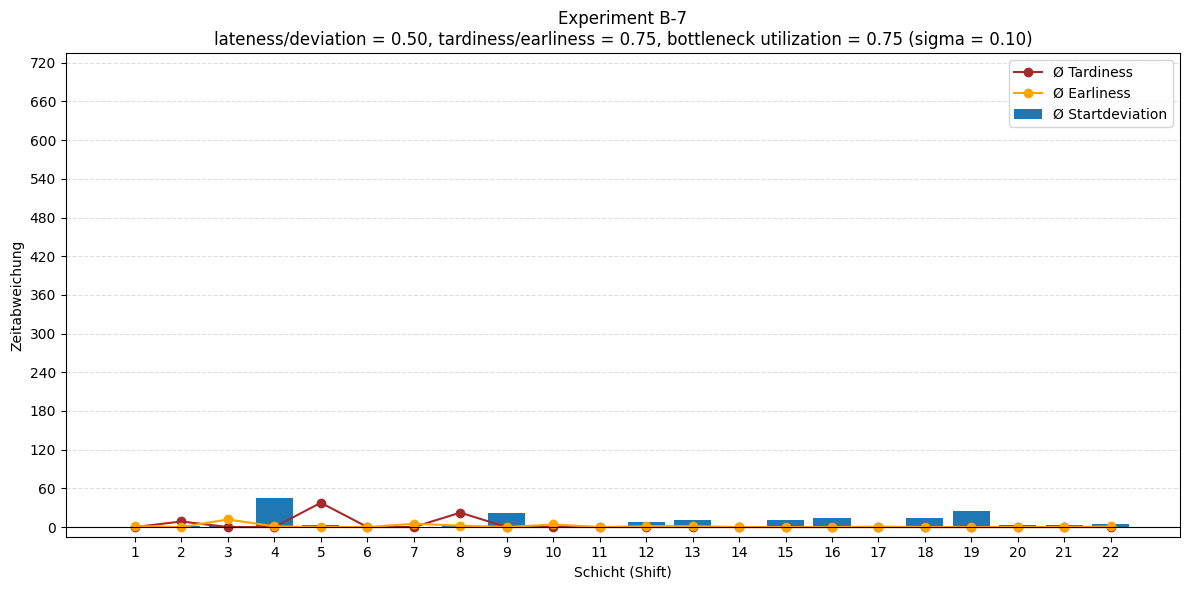

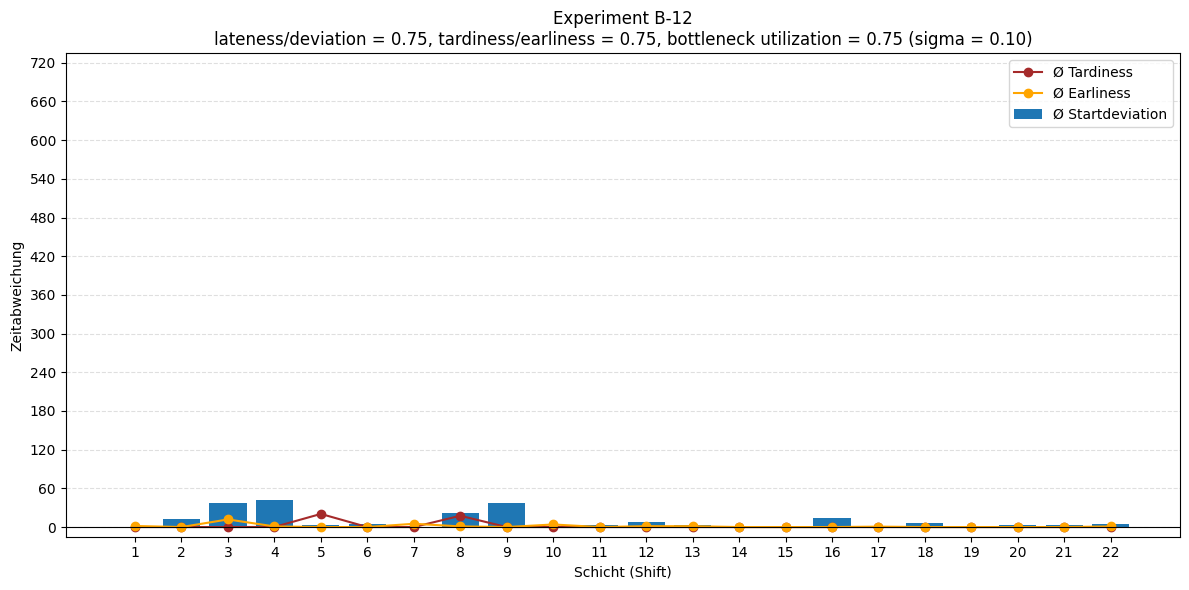

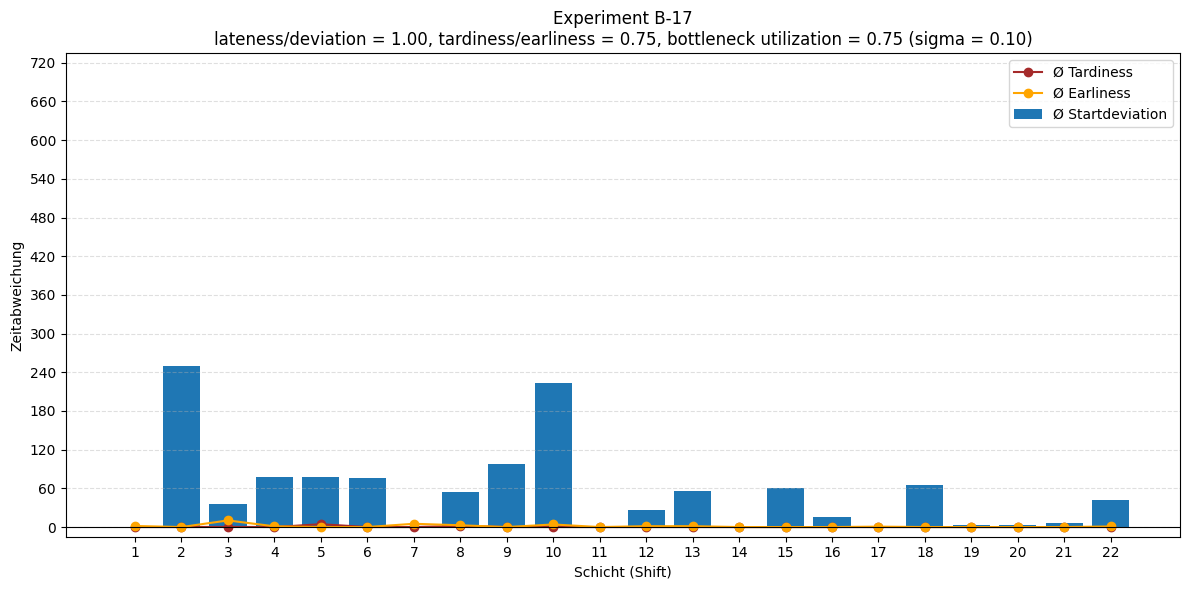

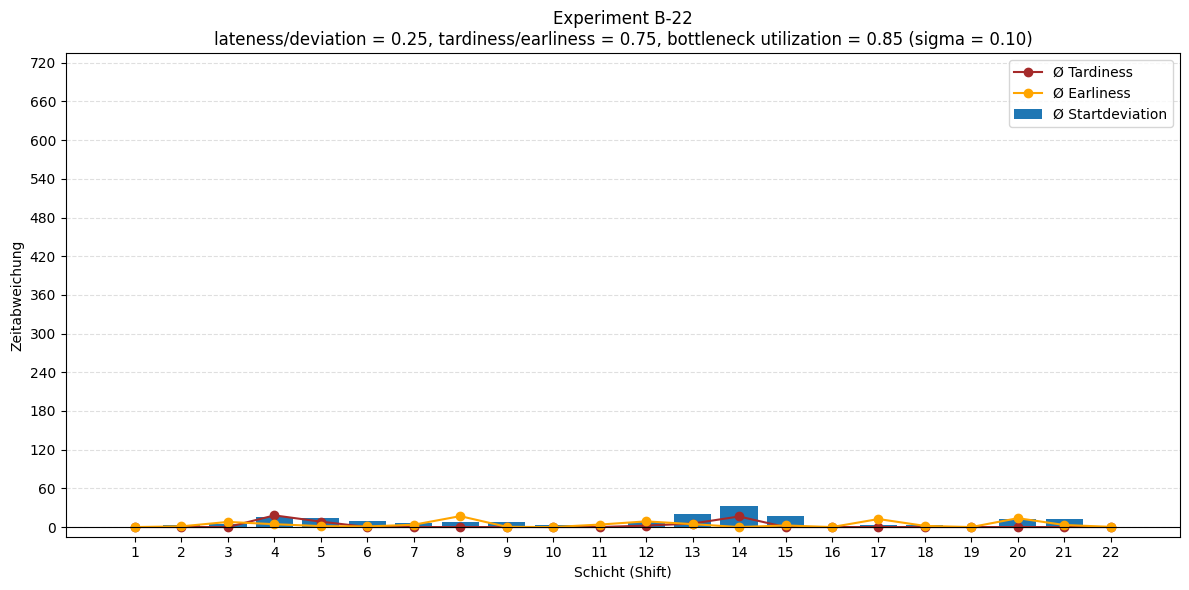

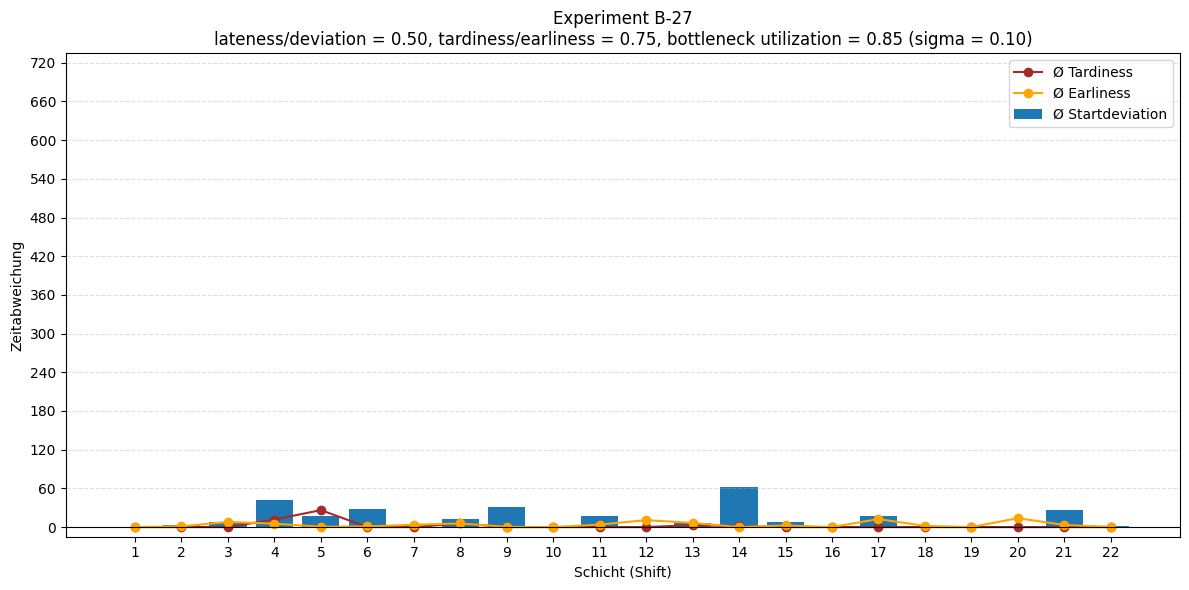

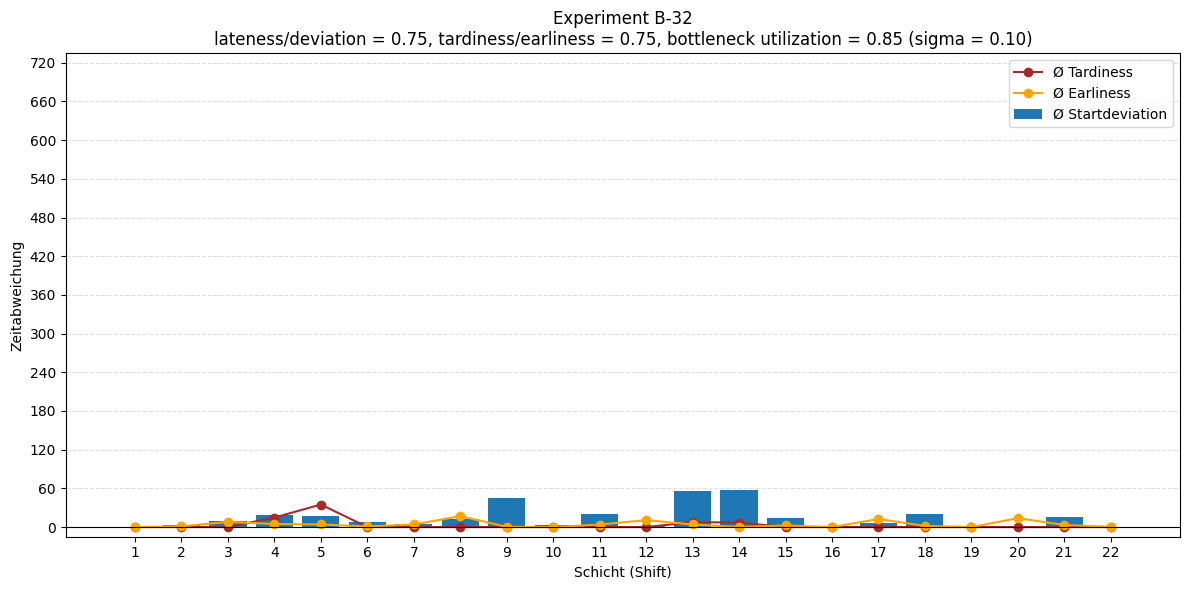

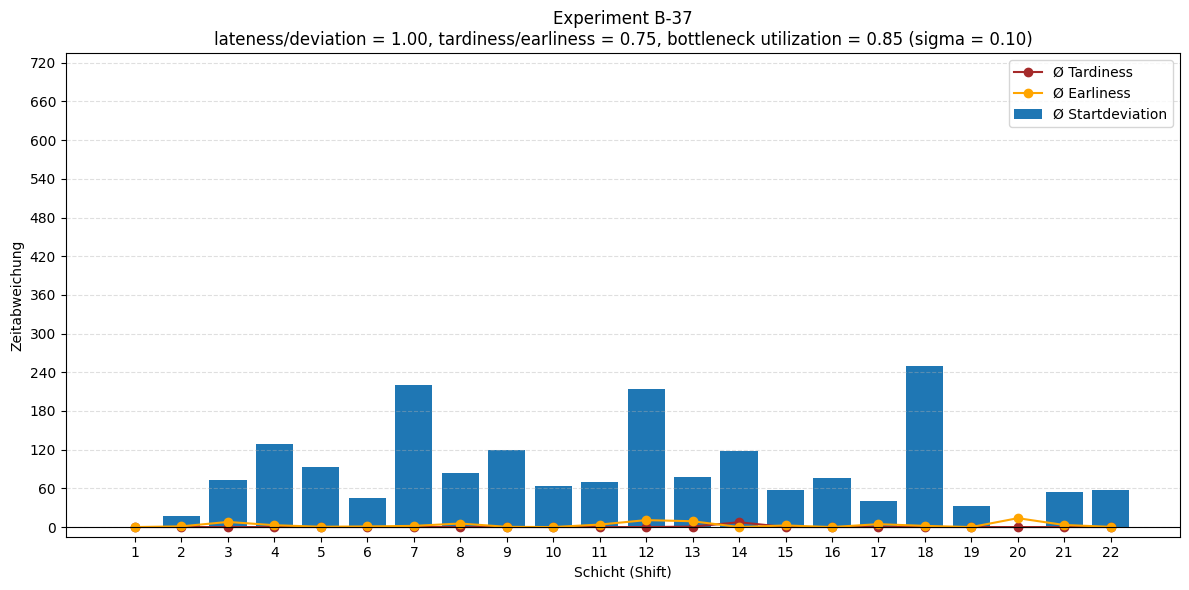

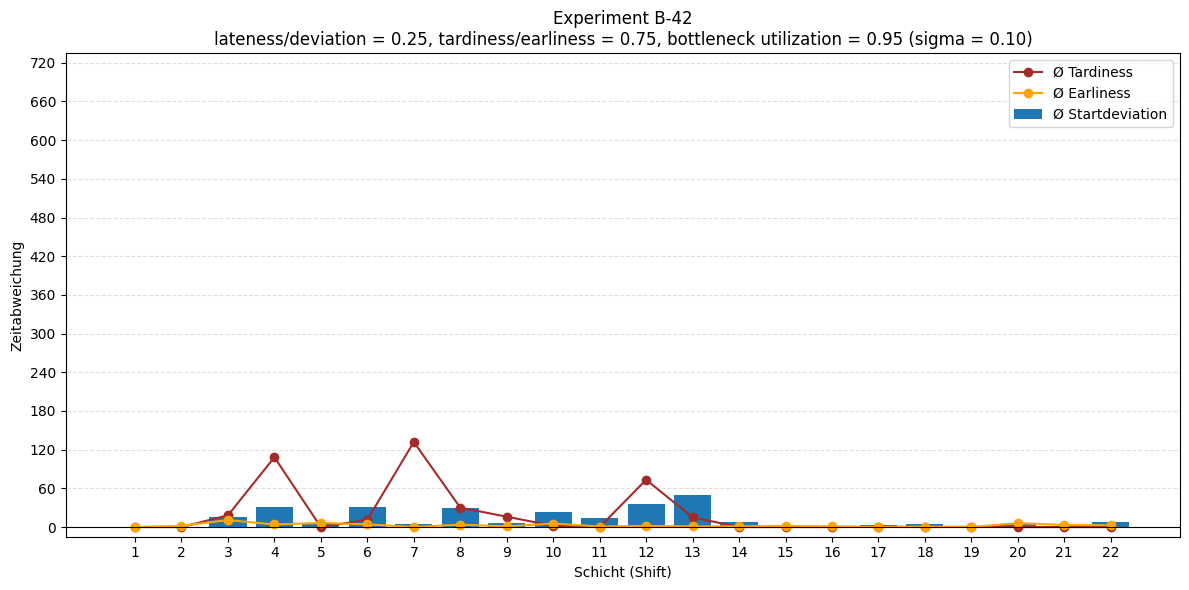

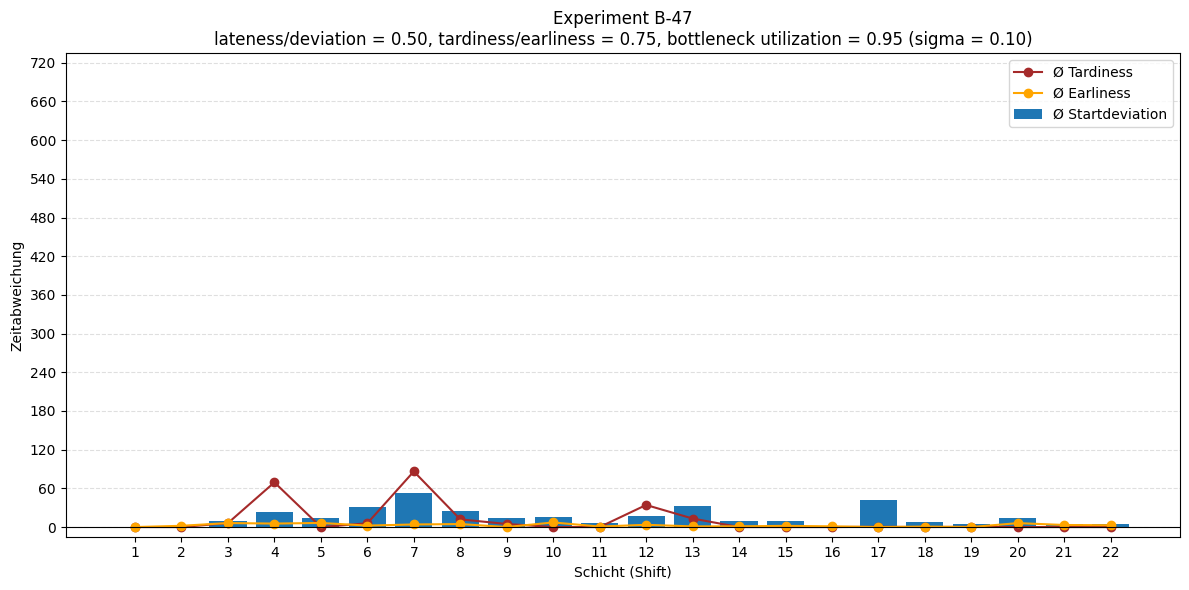

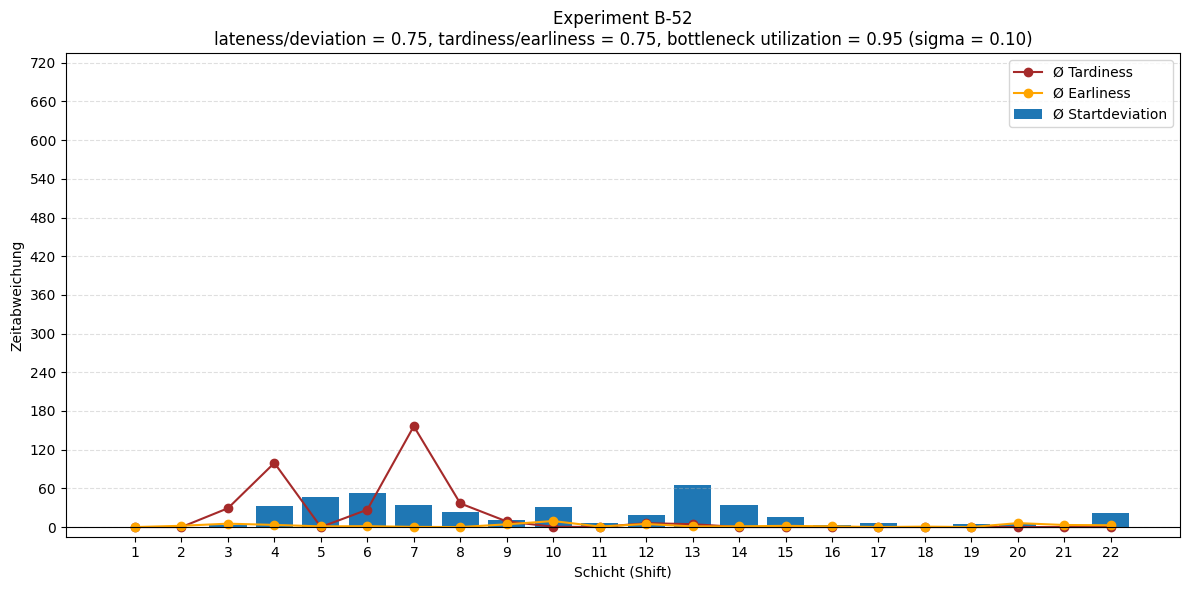

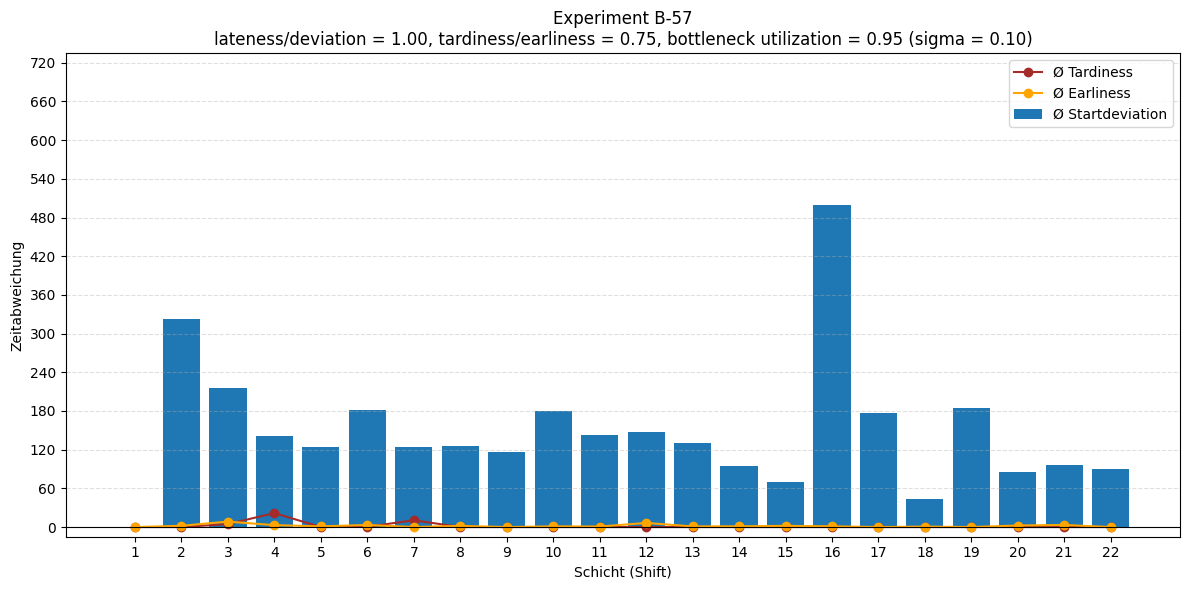

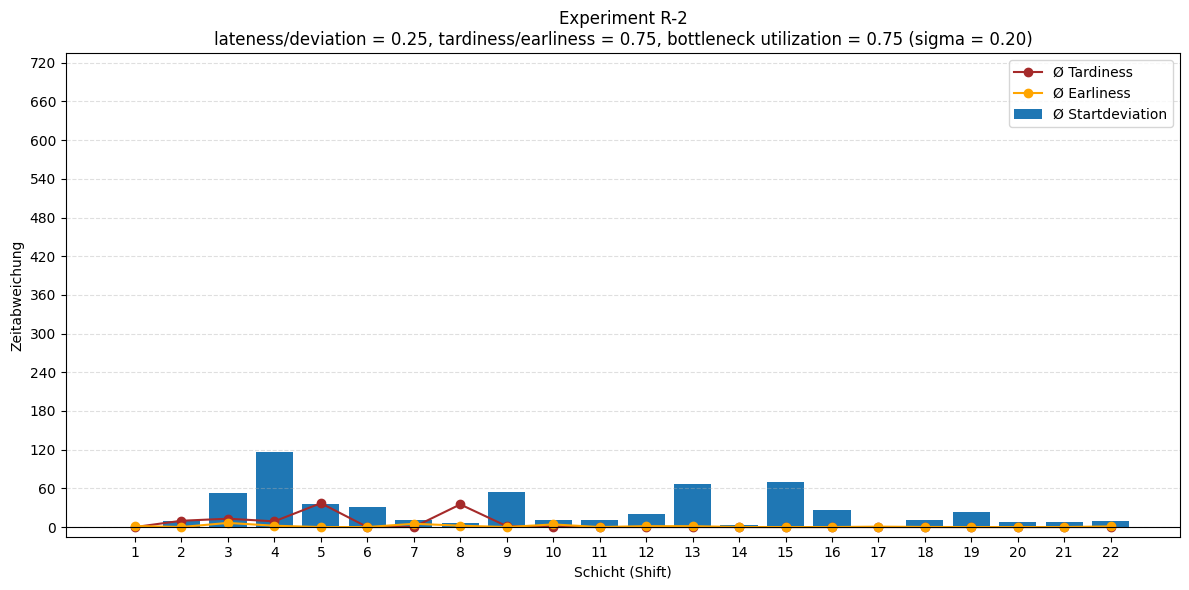

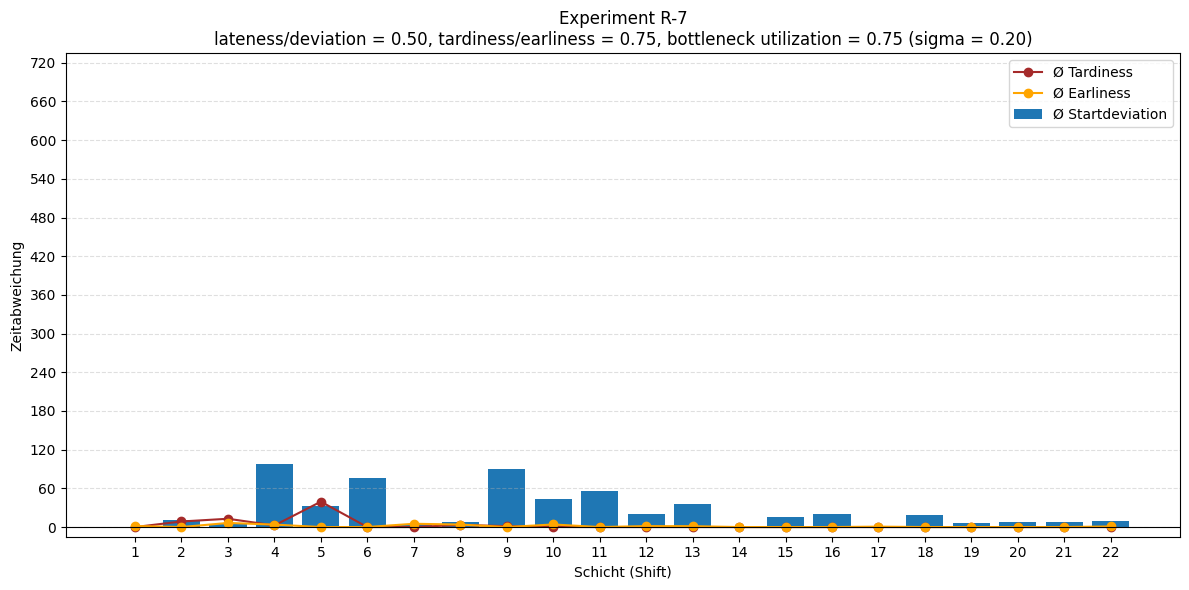

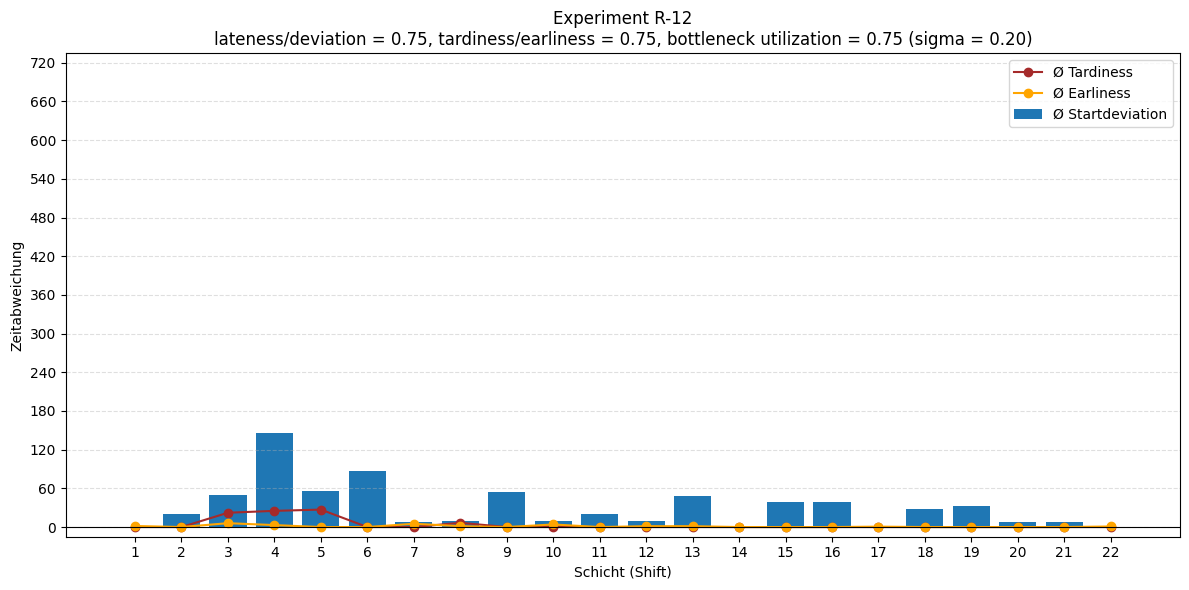

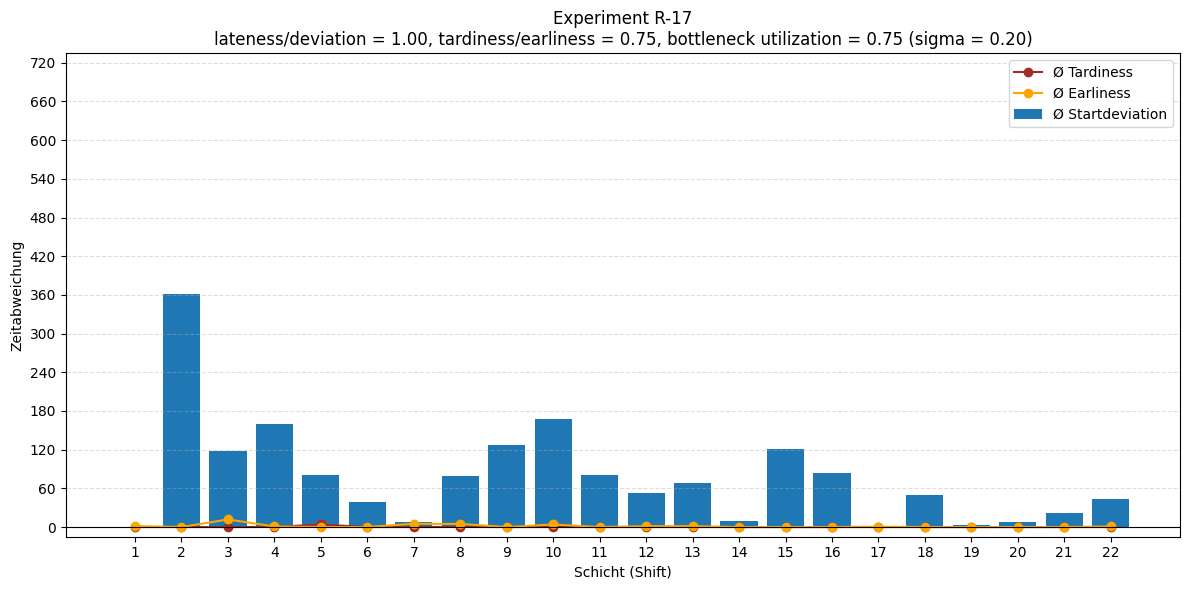

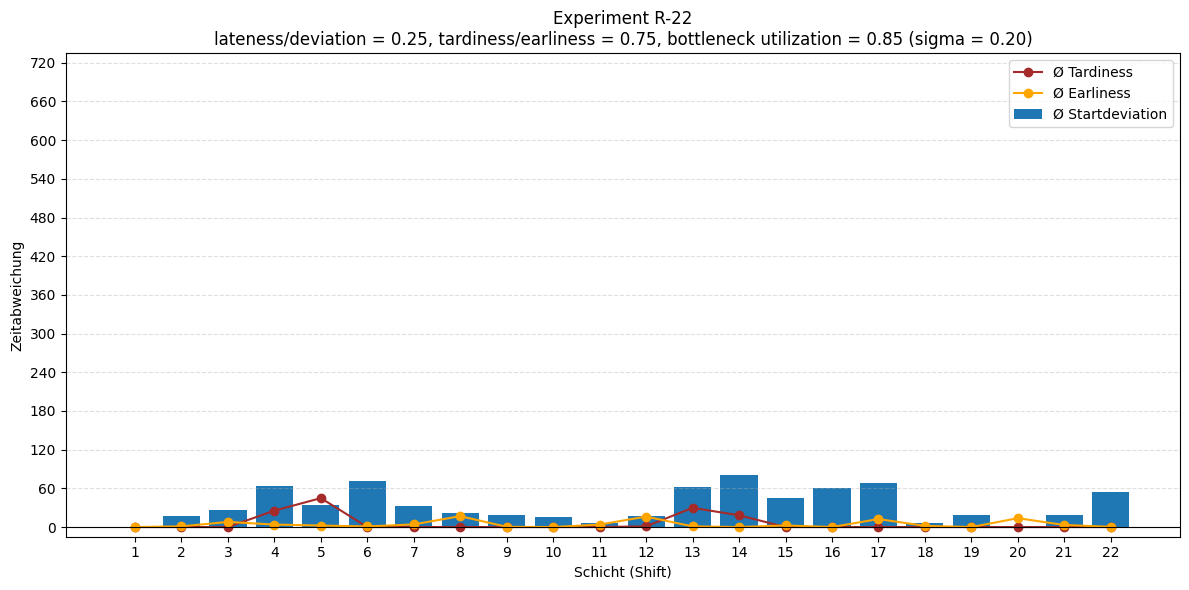

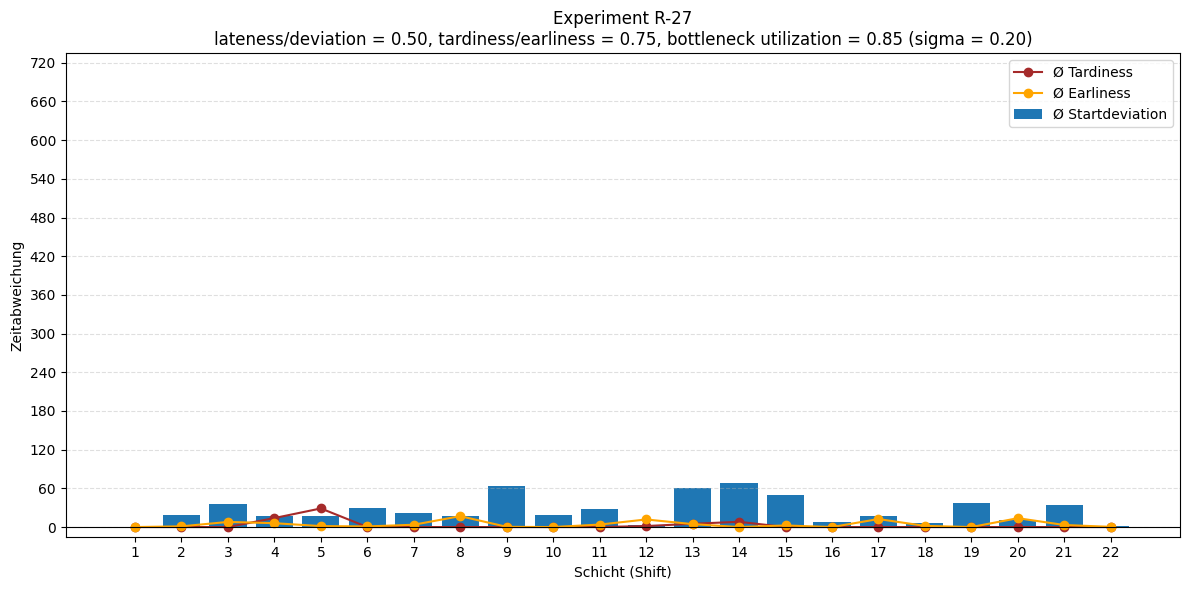

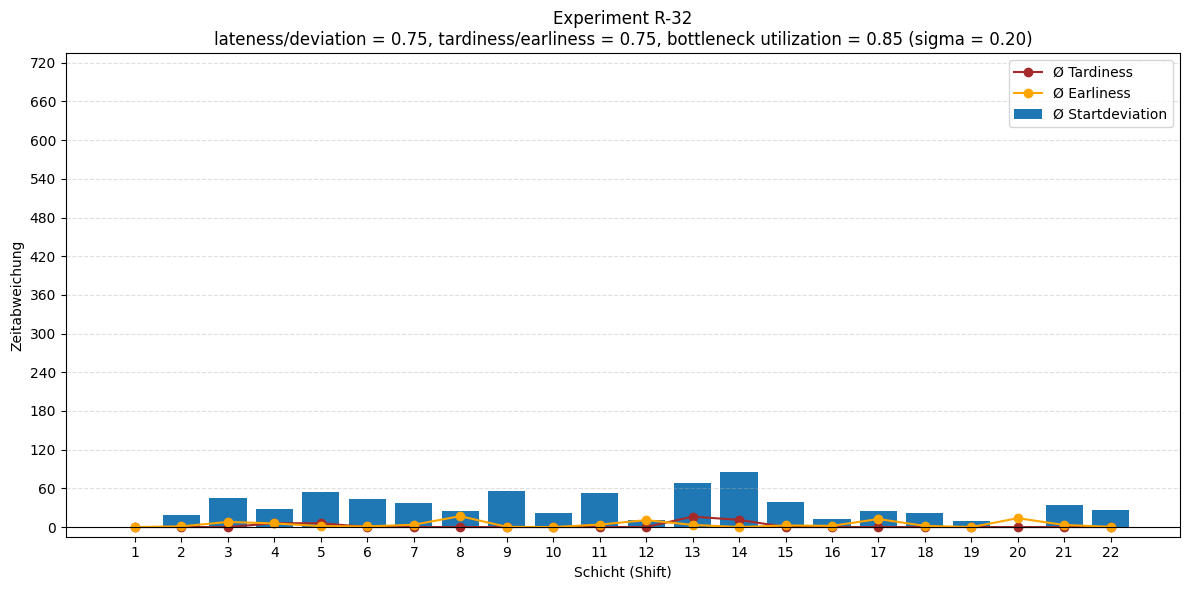

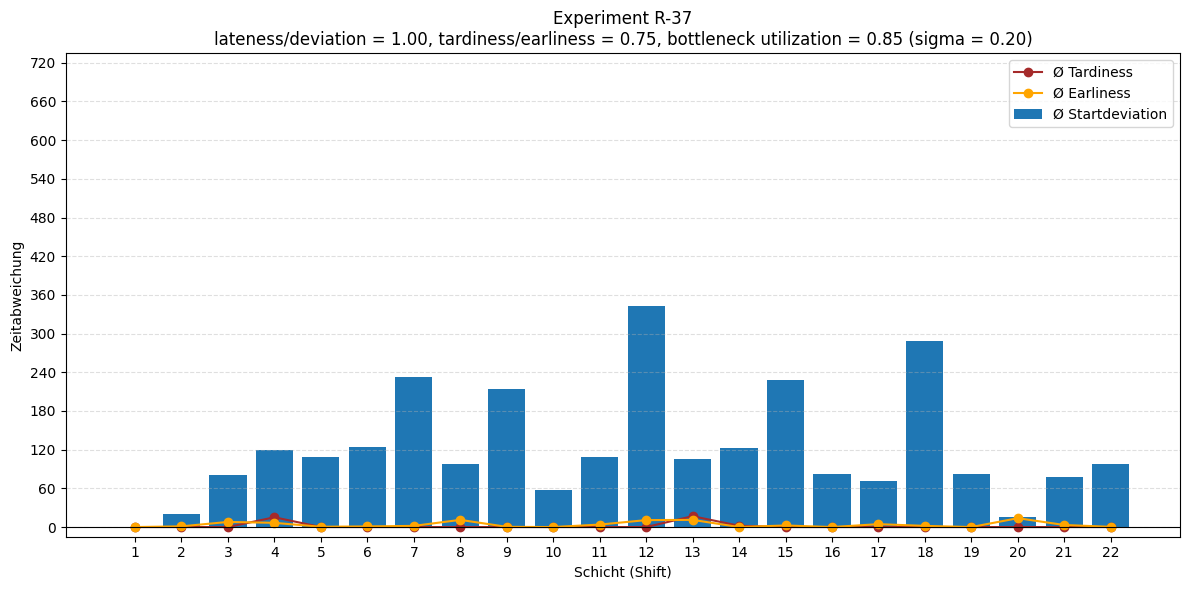

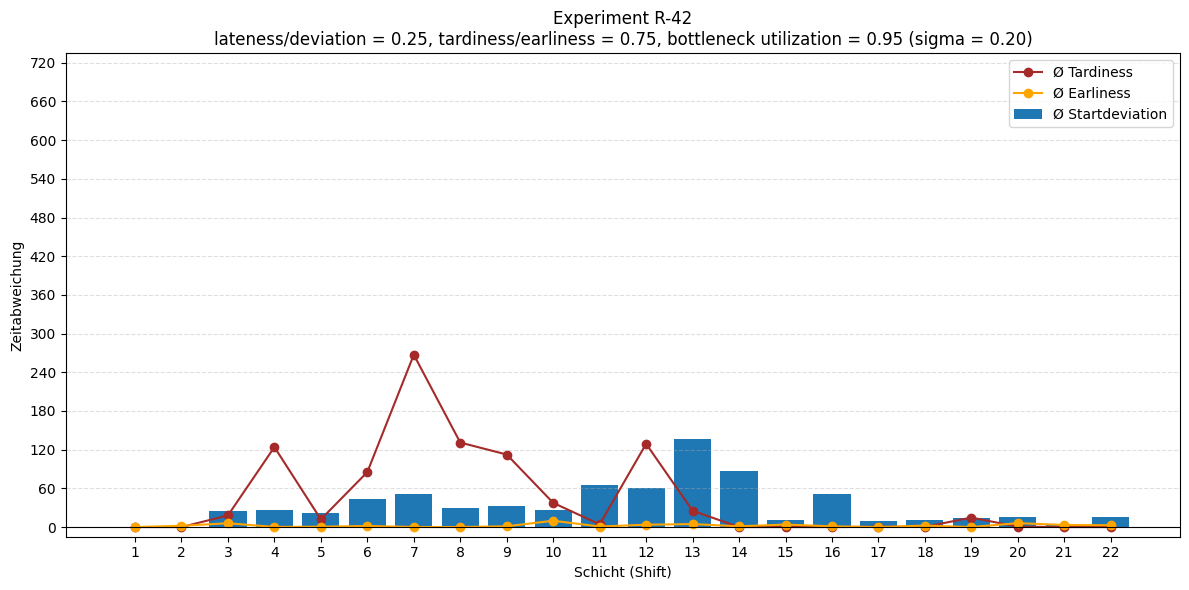

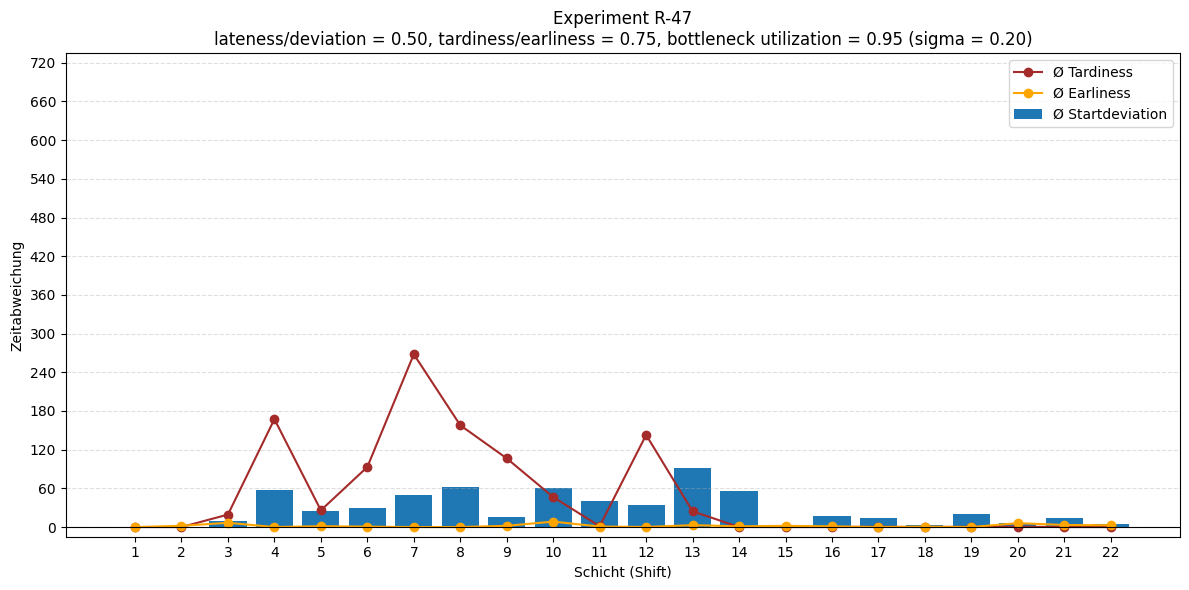

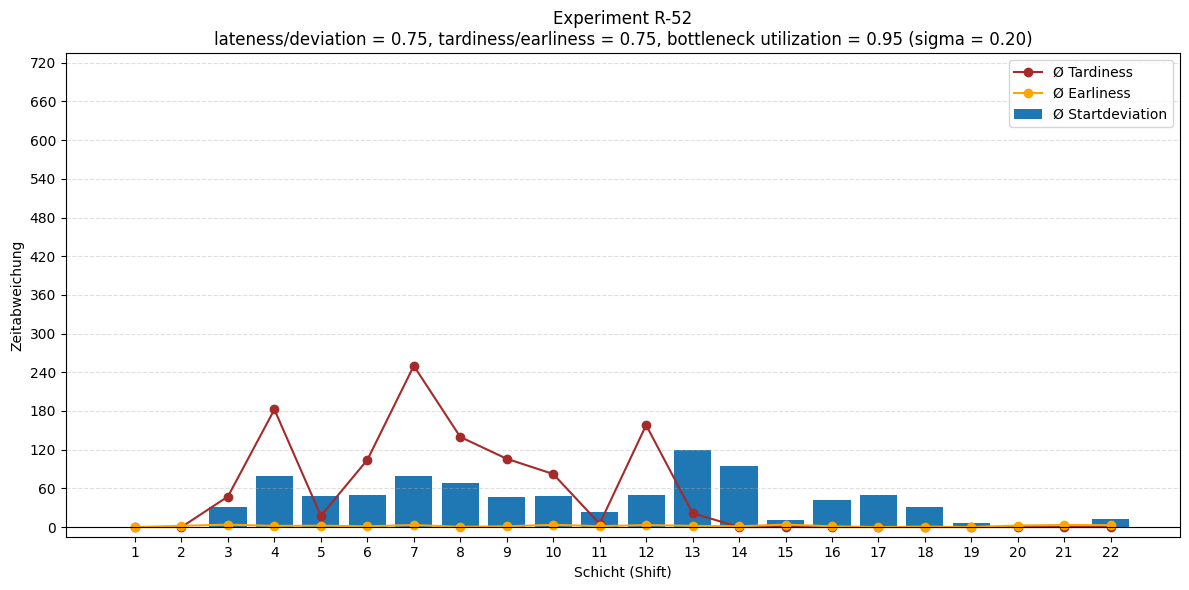

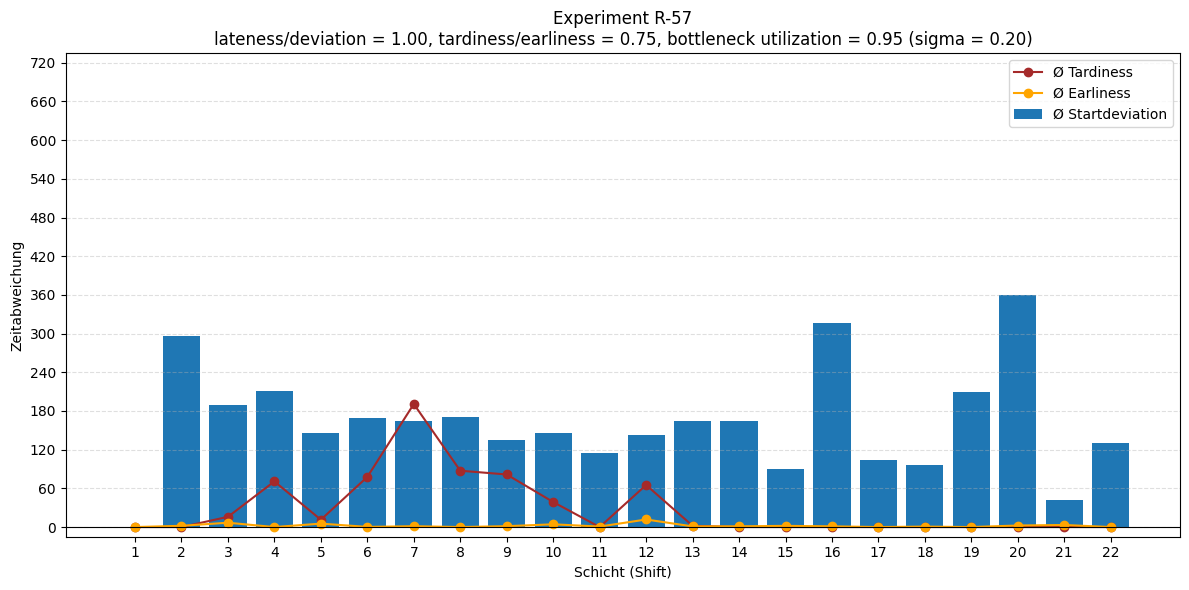

In [10]:
plt.show()
df_experiments_filtered = df_experiments[
    (df_experiments["Abs Lateness Ratio"].isin([0.25, 0.5, 0.75, 1])) &
    (df_experiments["Inner Tardiness Ratio"] == 0.75) &
    (df_experiments["Sim Sigma"].isin([0.1, 0.2]))
    ]

experiment_ids = df_experiments_filtered["Experiment_ID"].tolist()

for experiment_id in experiment_ids:
    make_combined_figure_startdeviation_tardiness_earliness(
        df_dev=df_dev,
        df_metrics=df_metrics,
        experiment_id=experiment_id,
        y_step=60,
        y_max=720,
        title=f"{get_experiment_string(df_experiments, experiment_id)}"
    )
    plt.show()